<a href="https://colab.research.google.com/github/hmrizal/biopython/blob/main/forum_session_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.2 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.9 MB/s eta 0:00:00


Given 2 Sequences:

Seq 1 = 'ATGCATGGTGCGCGA'<br>
Seq 2 = 'ATTTGTGCTCCTGGA'


In [ ]:
import Bio

In [ ]:
from Bio.Seq import Seq

In [ ]:
seq_1 = 'ATGCATGGTGCGCGA'
seq_2 = 'ATTTGTGCTCCTGGA'

In [ ]:
# Simple DNA sequence

seq1 = Seq(seq_1)
seq2 = Seq(seq_2)

print("Seq 1:", seq1)
print("Seq 2:", seq2)

Seq 1: ATGCATGGTGCGCGA
Seq 2: ATTTGTGCTCCTGGA


In [ ]:
print("Seq 1 panjangnya",len(seq1),"nukleotida")
print("Seq 2 panjangnya",len(seq2),"nukleotida")

Seq 1 panjangnya 15 nukleotida
Seq 2 panjangnya 15 nukleotida


In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
# Get the global alignment and the score

alignment = pairwise2.align.globalxx(seq1,seq2)
alignment2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

# similarity

sim = round(alignment2/len(seq2)*100,2)

In [ ]:
# Get the global alignment and the score

loc_alignment = pairwise2.align.localxx(seq1,seq2)
loc_alignment2 = pairwise2.align.localxx(seq1,seq2,one_alignment_only=True,score_only=True)

# similarity

loc_sim = round(loc_alignment2/len(seq2)*100,2)

In [ ]:
print("Global alignment")
print("{} kemungkinan\nSkor = {}\nSimilarity = {}".format(len(alignment),alignment2,sim))

Global alignment
227 kemungkinan
Skor = 10.0
Similarity = 66.67


In [ ]:
print("Local alignment")
print("{} kemungkinan\nSkor = {}\nSimilarity = {}".format(len(loc_alignment),loc_alignment2,loc_sim))

Local alignment
227 kemungkinan
Skor = 10.0
Similarity = 66.67


In [ ]:
# Get the global alignment with the highest score

alignment_ms = pairwise2.align.globalms(seq1,seq2,2,-1,-0.5,-0.1)
alignment2_ms = pairwise2.align.globalms(seq1,seq2,2,-1,-0.5,-0.1,one_alignment_only=True,score_only=True)

# similarity

sim_ms = round(alignment2_ms/len(seq2)*100,2)

In [ ]:
# Get the local alignment with the highest score

loc_alignment_ms = pairwise2.align.localms(seq1,seq2,2,-1,-0.5,-0.1)
loc_alignment2_ms = pairwise2.align.localms(seq1,seq2,2,-1,-0.5,-0.1,one_alignment_only=True,score_only=True)

# similarity

loc_sim_ms = round(loc_alignment2_ms/len(seq2)*100,2)

In [ ]:
print("Global alignment dengan Skor Tertinggi")
print("{} kemungkinan\nSkor = {}\nSimilarity = {}%".format(len(alignment_ms),alignment2_ms,sim_ms))

Global alignment dengan Skor Tertinggi
7 kemungkinan
Skor = 17.0
Similarity = 113.33%


In [ ]:
print("Local alignment dengan Skor Tertinggi")
print("{} kemungkinan\nSkor = {}\nSimilarity = {}%".format(len(loc_alignment_ms),loc_alignment2_ms,loc_sim_ms))

Local alignment dengan Skor Tertinggi
7 kemungkinan
Skor = 17.0
Similarity = 113.33%


In [ ]:
# Fungsi Hamming Distance

def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

hamming_distance(seq1,seq2)

7

In [ ]:
from Levenshtein import distance

In [ ]:
print("Hamming Distance =",hamming_distance(seq1,seq2))
print("Levenshtein Distance =",distance(str(seq1),str(seq2)))

Hamming Distance = 7
Levenshtein Distance = 7


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# dotplot function

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice


def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

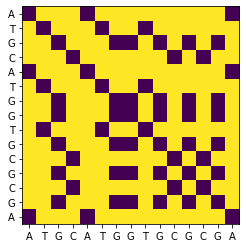

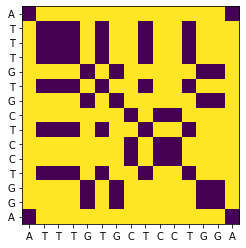

In [ ]:
# Identical show diagonal

dotplotx(seq1,seq1)
dotplotx(seq2,seq2)

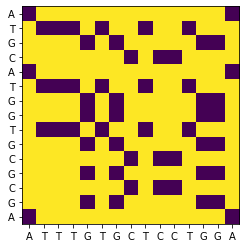

In [ ]:
#plt.figure(figsize=(15, 15))
dotplotx(seq1,seq2)